In [3]:
def get_keydata(dt,num):
    import pandas as pd
    import numpy as np
    s=dt[1:len(dt)-1]
    s1=dt[0:len(dt)-2]
    s2=dt[2:len(dt)]
    sd=abs(s.values-(s1.values+s2.values)/2)
    SSd=pd.Series(sd,index=np.arange(1,len(dt)-1))
    SSd=SSd.sort_values(ascending=False)
    SSd=SSd[0:num-2]
    st=pd.Series([dt[0],dt[len(dt)-1]],index=[0,len(dt)-1])
    # SSd=SSd.append(st)
    SSd = pd.concat([SSd, st], axis=0)
    keydata=dt[SSd.index].sort_index()
    return keydata
def get_tz(keydata):
    import numpy as np
    y1=keydata.values[1:]
    y2=keydata.values[0:-1]
    x1=keydata.index[1:]
    x2=keydata.index[0:-1]
    tan=list((y2-y1)/(x2-x1))
    T=np.array(tan)
    I7=T>0.5
    i1=T>0.2
    i2=T<=0.5
    I6=i1&i2
    i1=T>0.1
    i2=T<=0.2
    I5=i1&i2
    i1=T>-0.1
    i2=T<=0.1
    I4=i1&i2
    i1=T>-0.2
    i2=T<=-0.1
    I3=i1&i2
    i1=T>=-0.5
    i2=T<=-0.2
    I2=i1&i2
    I1=T<-0.5
    T[I1]=1
    T[I2]=2
    T[I3]=3
    T[I4]=4
    T[I5]=5
    T[I6]=6
    T[I7]=7
    return T

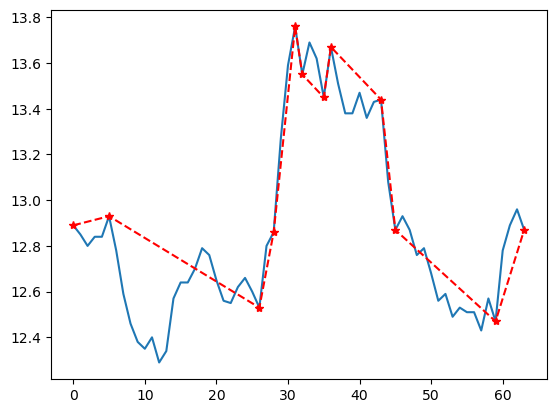

In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel('DA.xlsx')
#提取满足日期条件的数据
I1=data['Trddt'].values>'2017-06-01'
I2=data['Trddt'].values<'2017-08-31'
I=I1&I2
data1=data.iloc[I,:]
#提取代码600000的收盘价
dt=data1.loc[data1['Stkcd']==600000,['Clsprc']]['Clsprc']
#收盘价序列的index重排，从0开始
dt=pd.Series(dt.values,index=range(len(dt)))
#调用关键点获取函数
keydata=get_keydata(dt,12)
#绘图
plt.plot(dt.index,dt.values)
plt.plot(keydata.index,keydata.values,'r*--')
T=get_tz(keydata)